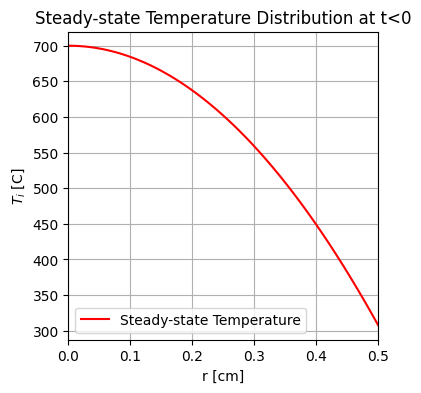

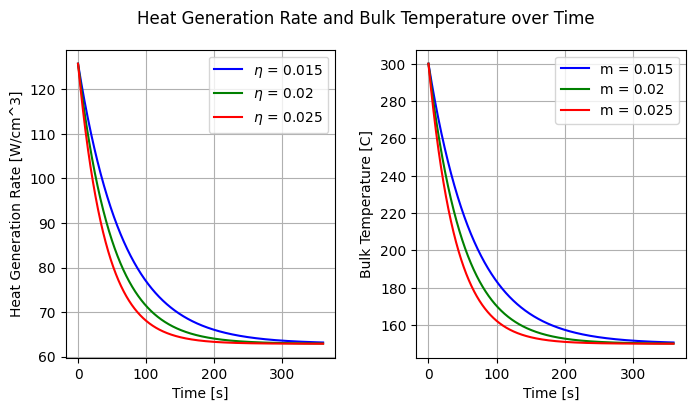

[ 4.76709448 10.94253328 17.15458924 23.37511651 29.59908185]
The eigenvalues are:
order = 1 λ = 4.76709
order = 2 λ = 10.94253
order = 3 λ = 17.15459
order = 4 λ = 23.37512
order = 5 λ = 29.59908
order = 6 λ = 35.82495
order = 7 λ = 42.05213
order = 8 λ = 48.28037
order = 9 λ = 54.50955
order = 10 λ = 60.73963
order = 11 λ = 66.97061
order = 12 λ = 73.20249
order = 13 λ = 79.43528
order = 14 λ = 85.66901
order = 15 λ = 91.90370
order = 16 λ = 98.13936
order = 17 λ = 104.37601
order = 18 λ = 110.61366
order = 19 λ = 116.85232
order = 20 λ = 123.09200
order = 21 λ = 129.33270
order = 22 λ = 135.57441


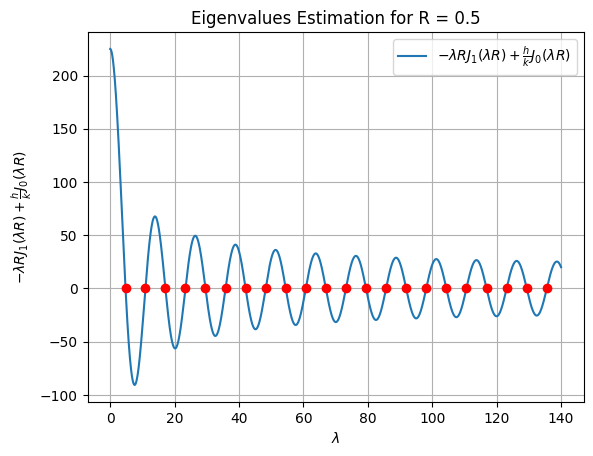

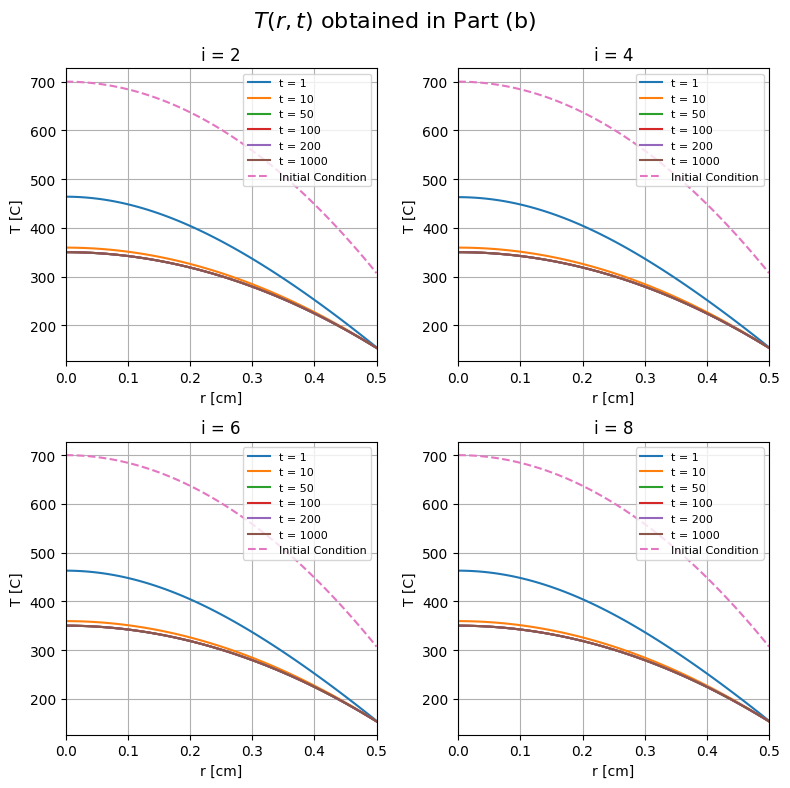

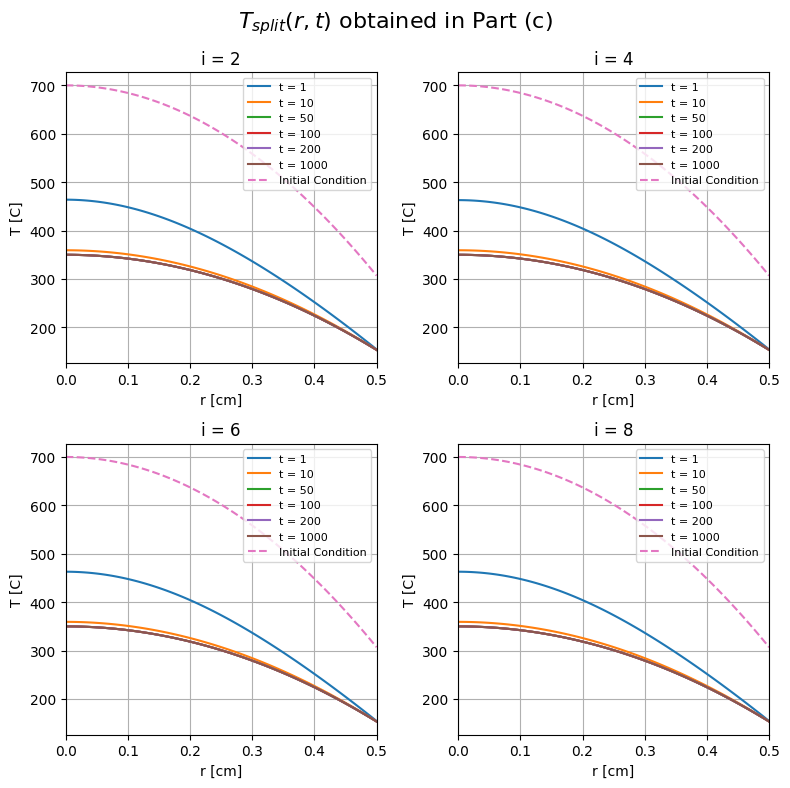

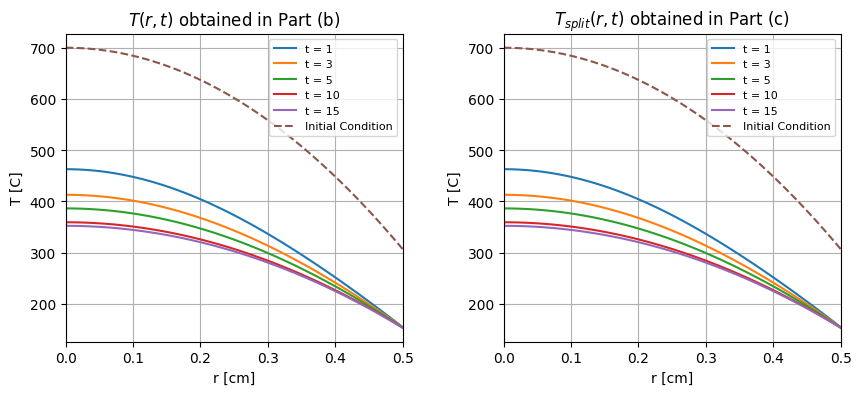

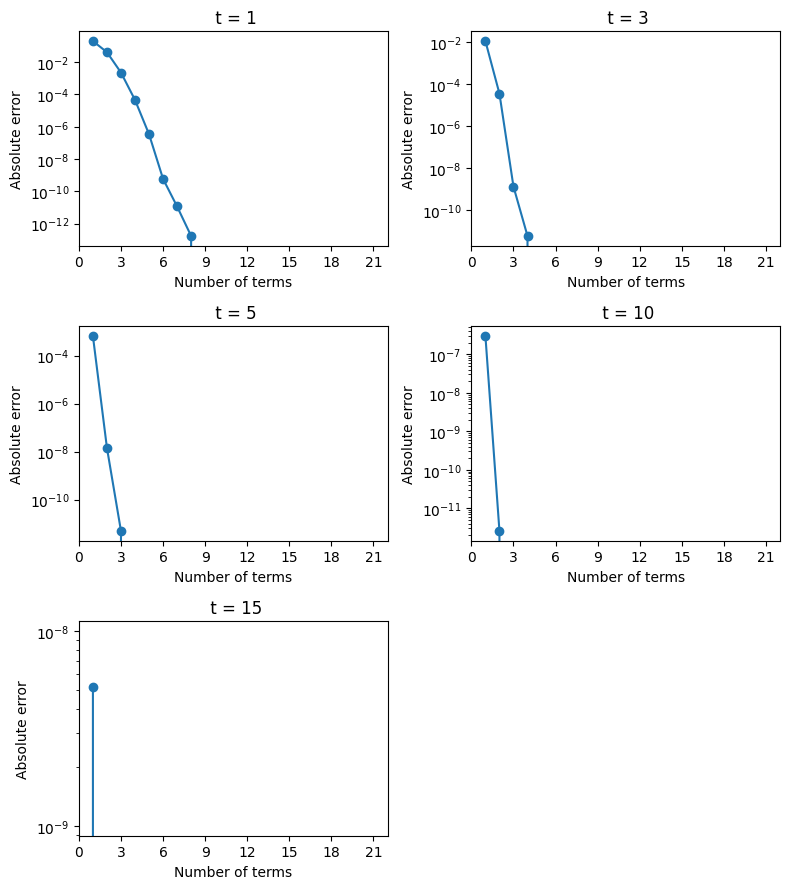

Time t                     1             3             5             10  \
Number of terms                                                           
1                2.009632e-01  1.143181e-02  6.458079e-04  2.988249e-07   
2                4.111341e-02  3.543542e-05  1.409563e-08  2.557954e-12   
3                2.255214e-03  1.304670e-09  4.888534e-12  0.000000e+00   
4                4.537608e-05  5.741185e-12  0.000000e+00  0.000000e+00   
5                3.424119e-07  0.000000e+00  0.000000e+00  0.000000e+00   
6                5.862262e-10  0.000000e+00  0.000000e+00  0.000000e+00   
7                1.148237e-11  0.000000e+00  0.000000e+00  0.000000e+00   
8                1.705303e-13  0.000000e+00  0.000000e+00  0.000000e+00   
9                0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
10               0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
11               0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
12               0.000000

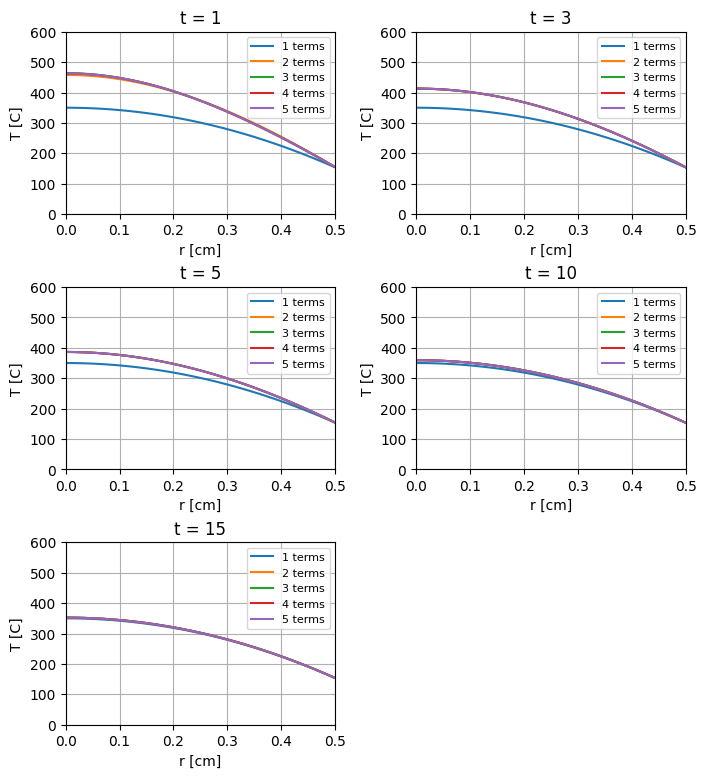

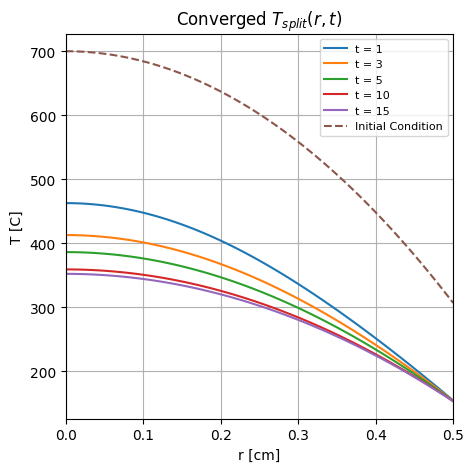

    Eigenvalues
0      4.767094
1     10.942533
2     17.154589
3     23.375117
4     29.599082
5     35.824950
6     42.052130
7     48.280366
8     54.509548
9     60.739633
10    66.970610
11    73.202488
12    79.435283
13    85.669014
14    91.903700
15    98.139359
16   104.376008
17   110.613658
18   116.852319
19   123.091998
20   129.332696
21   135.574413


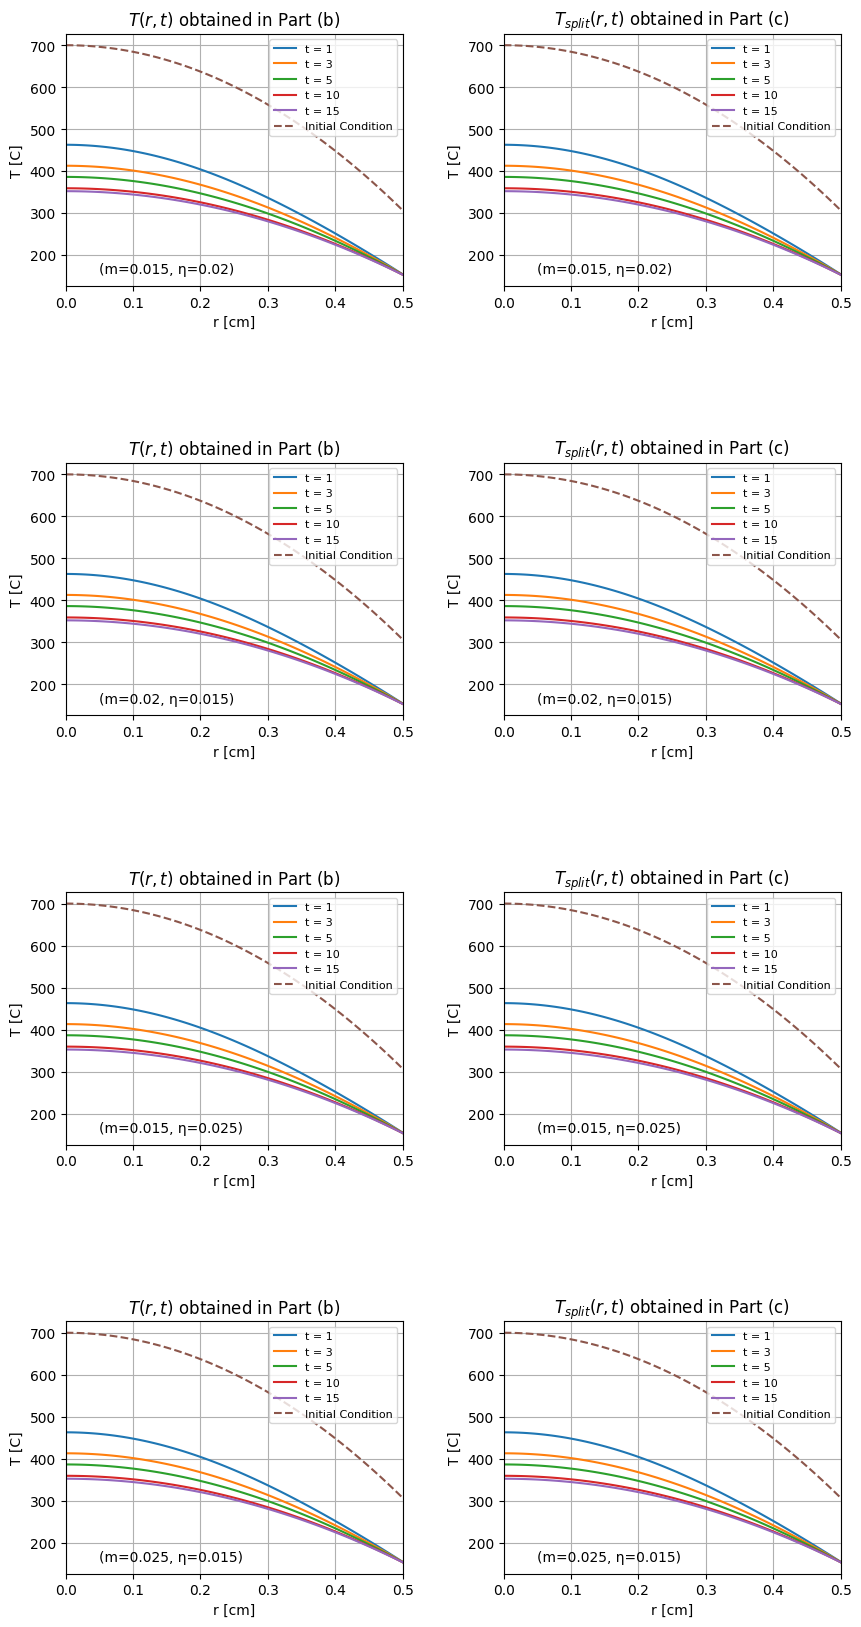

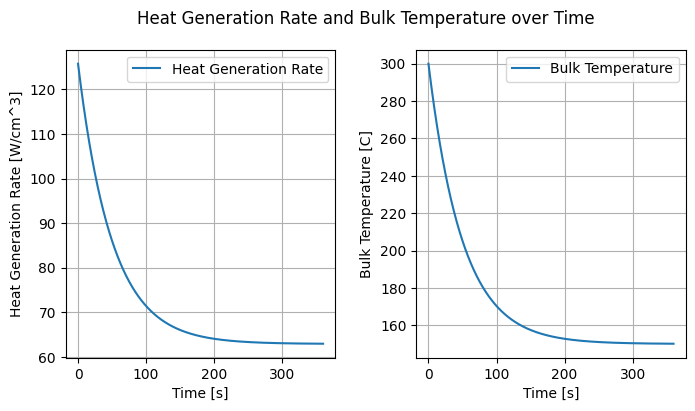

Nr=30: RMSE=26.091154572390707, MAE=17.892518860538193, dr=0.0167, dt=0.0002
Nr=50: RMSE=9.880545034260214, MAE=6.5467866538841575, dr=0.0100, dt=0.0002
Nr=70: RMSE=4.124532892365632, MAE=2.693695451190072, dr=0.0071, dt=0.0002
Nr=90: RMSE=2.261143925497651, MAE=1.466823062545936, dr=0.0056, dt=0.0002
Nr=120: RMSE=1.9524077265415387, MAE=1.2590035436782605, dr=0.0042, dt=0.0002
Nr=150: RMSE=1.1633318671532304, MAE=0.7476831122731828, dr=0.0033, dt=0.0002
Nr=320: RMSE=2.4360473753472887, MAE=1.5563445645305938, dr=0.0016, dt=0.0002


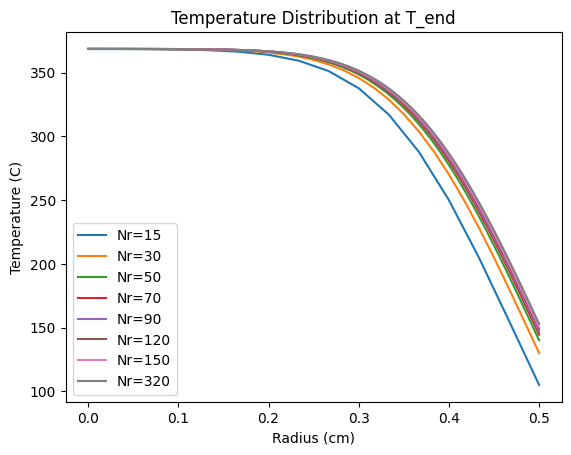

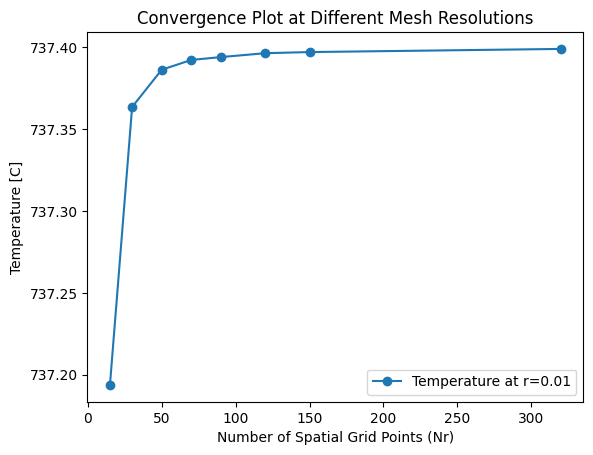

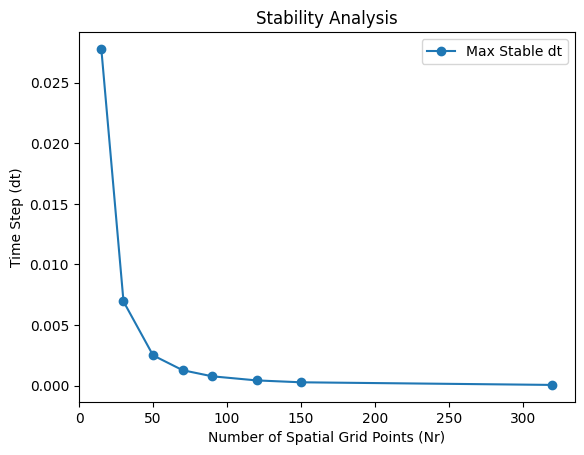

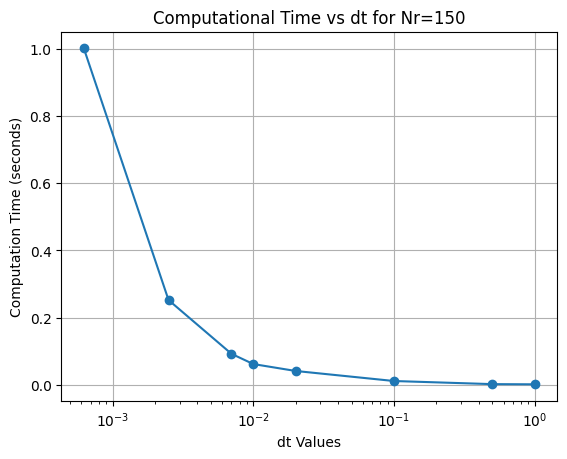

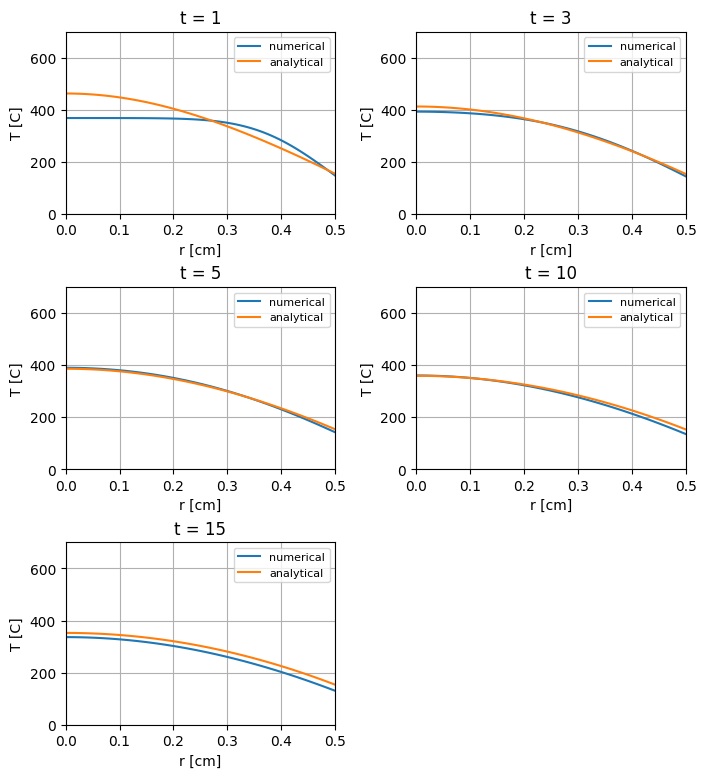

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.special import jv
from scipy.optimize import brentq
import matplotlib.ticker as ticker
import time
import pandas as pd

# Given parameters
T_max = 700  # [C]
R = 0.5  # radius of fuel [cm]
rho = 10.75  # density of fuel [g/cm^3]
k = 0.02  # thermal conductivity of fuel [W/cm-K]
cp = 0.3110765  # specific heat of fuel [J/g-K]
q_dot_0 = 125.76  # heat generation rate [W/cm^3]
h = 4.5  # convection coefficient [W/cm^2-K]
Tb0 = 300  # initial bulk temperature [K]
m = 0.02 # parameter for bulk temperature
initial_cylinder_temp = 700  # initial cylinder temperature [K]
eta = 0.02 # parameter for heat generation

# Radial coordinates
r = np.linspace(0, R, 100)

# T(r) The temperature distribution in the fuel cylinder at t < 0
def T(r):
    return -q_dot_0 * r**2 / (4*k) + q_dot_0 * R / (2*h) + q_dot_0 * R**2 / (4*k) + Tb0

# or -q_dot_0 * r**2 / (4*k) + T_max but it was recommended I express it the way I did above

# plot T(r) vs r
r = np.linspace(0, R, 100)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(r, T(r), 'r-', label='Steady-state Temperature')
ax.set_xlabel('r [cm]')
ax.set_ylabel('$T_i$ [C]')
ax.set_title('Steady-state Temperature Distribution at t<0')
ax.grid(True)
ax.set_xlim(0, R)
ax.legend()
plt.show()

# for use in later parts
T_ss = T(r)


# e. Heat generation rate and bulk temperature over time

# alpha
alpha = k / (rho * cp)

# Radial coordinates
r = np.linspace(0, R, 100)

# Heat generation rate function [W/cm^3]
def q(q_dot_0, eta, t):
    return q_dot_0 * 0.5 * (1 + np.exp(-eta * t))

# Bulk temperature function [C]
def Tb(Tb0, m, t):
    return Tb0 * 0.5 * (1 + np.exp(-m * t))

# Plotting heat generation rate and bulk temperature over time
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Define colors for the lines
line_colors = ['blue', 'green', 'red']

# for part (e)
eta = [0.015, 0.02, 0.025]
m = [0.015, 0.02, 0.025]

t_values = np.linspace(0, 360, 5000)

for i in range(len(eta)):
    ax[0].plot(t_values, q(q_dot_0, eta[i], t_values), label='$\eta$ = {}'.format(eta[i]), color=line_colors[i])
    ax[1].plot(t_values, Tb(Tb0, m[i], t_values), label='m = {}'.format(m[i]), color=line_colors[i])

ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Heat Generation Rate [W/cm^3]')
ax[0].grid(True)
ax[0].legend()

ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Bulk Temperature [C]')
ax[1].grid(True)
ax[1].legend()

fig.suptitle('Heat Generation Rate and Bulk Temperature over Time')
plt.show()



# Find Eigenvalues

# Define the function whose roots we want to find
def func(lambda_val, R):
    return -lambda_val * jv(1, lambda_val * R) + h/k * jv(0, lambda_val * R)


lambda_max = 140

lambda_vals = np.linspace(0, lambda_max, 10000)  # Adjust range and density as needed
func_values = [func(val, R) for val in lambda_vals]

bracket_intervals = []
for i in range(1, len(func_values)):
    if func_values[i-1] * func_values[i] < 0:
        bracket_intervals.append((lambda_vals[i-1], lambda_vals[i]))

# Find the roots using the brackets obtained
eigenvalues = []
for bracket in bracket_intervals:
    try:
        root = brentq(func, bracket[0], bracket[1], args=(R))
        eigenvalues.append(root)
    except ValueError:
        pass

# Ensure uniqueness and sort eigenvalues
eigenvalues = sorted(set(eigenvalues))
eigenvalues = np.array(eigenvalues)


print(eigenvalues[0:5])

# Print the eigenvalues and number of roots
print("The eigenvalues are:")
for i, lambda_val in enumerate(eigenvalues):
    print(f"order = {i+1} \u03BB = {lambda_val:.5f}")

# Plot the function to visualize the roots
plt.plot(lambda_vals, func_values, label=r'$-\lambda R J_1(\lambda R) + \frac{h}{k} J_0(\lambda R)$')
plt.plot(eigenvalues, [0]*len(eigenvalues), 'ro')  # Roots
plt.legend()
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$-\lambda R J_1(\lambda R) + \frac{h}{k} J_0(\lambda R)$')
plt.title('Eigenvalues Estimation for R = ' + str(R))
plt.grid(True)
plt.show()

# save eigenvalues on memory using pandas data frame
df_eigenvalues = pd.DataFrame(eigenvalues, columns=['Eigenvalues'])

# (f) Plot the temperature profiles $T_{i}(r)$ for $ t< 0$, and $T_{ss}(r)$ as $t$ tends to infinity. Explain what happens as $t$ increases.

# Where J_{0} is the Bessel function of the first kind of order 0
def Norm(lam, R):
    return R**2 / 2 * (jv(0, lam * R)**2 + jv(1, lam * R)**2)

def A_n(lam, R, D1, D2, alpha, m, eta, option=None):
    # where J_{0} is the Bessel function of the first kind of order 0
    theta_n1 = D1 * R**2 / lam**2 * 2 * jv(2, lam * R) + D2 * R * jv(1, lam * R) / lam
    theta_n2 = D1 * R**2 / lam**2 * (-lam * R * jv(3, lam * R))
    V = R * jv(1, lam * R) / lam
    PS_n1 = (V**2 + V) / lam**2
    PS_n2 = V**2 * alpha / (m - alpha * lam**2)
    PS_n3 = V * alpha / (eta - alpha * lam**2)
    if option == None:
        return theta_n1 + theta_n2 - PS_n1 + PS_n2 + PS_n3
    elif option == 'sep':
        return theta_n1 + theta_n2 + PS_n2 + PS_n3

def T_bar(lam, t, R, D1, D2, alpha, m, eta, option=None):
    V = R * jv(1, lam * R) / lam
    if option == None:
        return A_n(lam, R, D1, D2, alpha, m, eta) * np.exp(-alpha * lam**2 * t) + (V**2 + V) / lam**2 - V**2 * alpha / (m - alpha * lam**2) * np.exp(-m * t) - V * alpha / (eta - alpha * lam**2) * np.exp(-eta * t)
    elif option == 'sep':
        return A_n(lam, R, D1, D2, alpha, m, eta, option='sep') * np.exp(-alpha * lam**2 * t) - V**2 * alpha / (m - alpha * lam**2) * np.exp(-m * t) - V * alpha / (eta - alpha * lam**2) * np.exp(-eta * t)

def C_n(lam, t, R, D1, D2, alpha, m, eta, option=None):
    if option == None:
        return T_bar(lam, t, R, D1, D2, alpha, m, eta) / Norm(lam, R)
    elif option == 'sep':
        return T_bar(lam, t, R, D1, D2, alpha, m, eta, option='sep') / Norm(lam, R)

def T_num(n, r, t, R, D1, D2, alpha, m, eta, option=None):
    if option == None:
        return sum([C_n(lam, t, R, D1, D2, alpha, m, eta) * jv(0, lam * r) * np.exp(-alpha * lam**2 * t) for lam in eigenvalues[0:n]])
    elif option == 'sep':
        return sum([C_n(lam, t, R, D1, D2, alpha, m, eta, option='sep') * jv(0, lam * r) * np.exp(-alpha * lam**2 * t) for lam in eigenvalues[0:n]])

# Plotting T(r, t) vs r
t = np.array([1, 10, 50, 100, 200, 1000])

# Plots from Part b.

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle(r'$T(r, t)$ obtained in Part (b)', fontsize=16)
# Iterate over each subplot
# varying number of terms in the series
for i, ax in enumerate(axs.flat):
    # Calculate T for each time point and plot
    for t_i in t:
        T_i = (T_ss + T_num((i+1)*2, r, t_i, R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep'))/2
        ax.plot(r, T_i, label=f't = {t_i}')
        ax.title.set_text(f'i = {(i+1)*2}')

    # Plot T_ss
    ax.plot(r, T_ss, ls='--', label='Initial Condition')

    # Set labels, title, and grid
    ax.set_xlabel('r [cm]')
    ax.set_ylabel('T [C]')
    ax.grid(True)
    ax.set_xlim(0, R)
    ax.legend(fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

# Plots from Part c.

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle(r'$T_{split}(r, t)$ obtained in Part (c)', fontsize=16)
# Iterate over each subplot
# varying number of terms in the series
for i, ax in enumerate(axs.flat):
    # Calculate T for each time point and plot
    for t_i in t:
        T_i = (T_ss + T_num((i+1)*2, r, t_i, R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02))/2
        ax.plot(r, T_i, label=f't = {t_i}')
        ax.title.set_text(f'i = {(i+1)*2}')

    # Plot T_ss
    ax.plot(r, T_ss, ls='--', label='Initial Condition')

    # Set labels, title, and grid
    ax.set_xlabel('r [cm]')
    ax.set_ylabel('T [C]')
    ax.grid(True)
    ax.set_xlim(0, R)
    ax.legend(fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

# part g.

# Plotting T(r, t) vs r
t = np.array([1, 3, 5, 10, 15])
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for t_i in t:
    ax[0].plot(r, (T_ss + T_num(5, r, t_i, R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02))/2, label=f't = {t_i}')
    ax[0].set_title(r'$T(r,t)$ obtained in Part (b)')
    ax[1].plot(r, (T_ss + T_num(5, r, t_i, R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep'))/2, label=f't = {t_i}')
    ax[1].set_title(r'$T_{split}(r,t)$ obtained in Part (c)')

for i in range(2):
    ax[i].plot(r, T_ss, ls='--', label='Initial Condition')
    ax[i].set_xlabel('r [cm]')
    ax[i].set_ylabel('T [C]')
    ax[i].grid(True)
    ax[i].set_xlim(0, R)
    ax[i].legend(fontsize=8, loc='upper right')


# Show the plot
plt.show()

# part h.

# Part I

# search for the number of terms in the series solution
t_search = np.copy(t)  # Adjust this to match the number of subplots

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 9))  # Adjust the size as needed
plt.subplots_adjust(wspace=0.3, hspace=0.3)
axs = axs.ravel()  # Flatten the array for easy indexing

# Dictionary to store absolute errors
error_dict = {}

# Iterate over each time point in t_search
for j in range(len(t_search)):
    errors = []
    terms = []
    # Initialize dictionary for this t
    error_dict[t_search[j]] = {}
    for i in range(1, len(eigenvalues)):
        T_test_i = T_ss + T_num(i, r, t_search[j], R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02)
        T_test_i_1 = T_ss + T_num(i+1, r, t_search[j], R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02)
        # calculate absolute error
        error = np.abs(T_test_i[-1] - T_test_i_1[-1])
        errors.append(error)
        terms.append(i)
        # Save error in dictionary
        error_dict[t_search[j]][i] = error

    # Plot absolute error vs number of terms
    axs[j].plot(terms, errors, marker='o')
    axs[j].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Set x-axis ticks to integer
    axs[j].set_yscale('log')
    axs[j].set_xlabel('Number of terms')
    axs[j].set_ylabel('Absolute error')
    axs[j].set_title(f' t = {t_search[j]}')

# Remove unused subplots
if len(t_search) < len(axs):
    for j in range(len(t_search), len(axs)):
        fig.delaxes(axs[j])

# Show the plot
plt.tight_layout()
plt.show()


# Part II

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 9))  # Adjust the size as needed
plt.subplots_adjust(wspace=0.3, hspace=0.4)
axs = axs.ravel()  # Flatten the array for easy indexing

for j in range(len(t_search)):
    for num in range(0, 5):
        axs[j].plot(r, (T_ss + T_num(num, r, t_search[j], R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02))/2, label=f'{num + 1} terms')
        axs[j].title.set_text(f't = {t_search[j]}')
        #axs[j].plot(r, T_ss, ls='--', label='Initial Condition')
        axs[j].set_xlabel('r [cm]')
        axs[j].set_ylabel('T [C]')
        axs[j].grid(True)
        axs[j].set_xlim(0, R)
        axs[j].set_ylim(0, 600)
        axs[j].legend(fontsize=8, loc='upper right')

# Remove unused subplots
if len(t_search) < len(axs):
    for j in range(len(t_search), len(axs)):
        fig.delaxes(axs[j])



# Show the table
import pandas as pd
error_df = pd.DataFrame(error_dict)
error_df = error_df.rename_axis('Number of terms')
error_df = error_df.rename_axis('Time t', axis='columns')

print(error_df)


# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(5, 5))  # Adjust the size as needed

axs.plot(r, (T_ss + T_num(3, r, t_search[0], R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep'))/2, label=f't = {t_search[0]}')
axs.plot(r, (T_ss + T_num(2, r, t_search[1], R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep'))/2, label=f't = {t_search[1]}')
axs.plot(r, (T_ss + T_num(1, r, t_search[2], R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep'))/2, label=f't = {t_search[2]}')
axs.plot(r, (T_ss + T_num(1, r, t_search[3], R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep'))/2, label=f't = {t_search[3]}')
axs.plot(r, (T_ss + T_num(1, r, t_search[4], R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02, option='sep'))/2, label=f't = {t_search[4]}')
axs.plot(r, T_ss, ls='--', label='Initial Condition')
axs.set_xlabel('r [cm]')
axs.set_ylabel('T [C]')
axs.grid(True)
axs.set_xlim(0, R)
axs.legend(fontsize=8, loc='upper right')
axs.set_title(r'Converged $T_{split}(r,t)$')

# Show the plot
plt.show()


print(df_eigenvalues)

# Part i.

# Define pairs of (m, \u03B7)
pairs = [(0.015, 0.02), (0.02, 0.015), (0.015, 0.025), (0.025, 0.015)]

# Create subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.7)

# Iterate over each pair of (m, \u03B7)
for i, (m, eta) in enumerate(pairs):

    # m and eta
    for t_i in t:
        axs[i, 0].plot(r, (T_ss + T_num(5, r, t_i, R, -q_dot_0/(4*k), Tb0, alpha, m, eta))/2, label=f't = {t_i}')
        axs[i, 0].set_title(r'$T(r,t)$ obtained in Part (b)')
        axs[i, 1].plot(r, (T_ss + T_num(5, r, t_i, R, -q_dot_0/(4*k), Tb0, alpha, m, eta, option='sep'))/2, label=f't = {t_i}')
        axs[i, 1].set_title(r'$T_{split}(r,t)$ obtained in Part (c)')

    for j in range(2):
        axs[i, j].plot(r, T_ss, ls='--', label='Initial Condition')
        axs[i, j].set_xlabel('r [cm]')
        axs[i, j].set_ylabel('T [C]')
        axs[i, j].grid(True)
        axs[i, j].set_xlim(0, R)
        axs[i, j].legend(fontsize=8, loc='upper right')
        axs[i, j].text(0.1, 0.05, f'(m={m}, \u03B7={eta})', transform=axs[i, j].transAxes)

# Show the plot
plt.show()

# EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE


# Numerical Analysis

# Given parameters
T_max = 700  # [C]
R = 0.5  # radius of fuel [cm]
rho = 10.75  # density of fuel [g/cm^3]
k = 0.02  # thermal conductivity of fuel [W/cm-K]
cp = 0.3110765  # specific heat of fuel [J/g-K]
q_dot_0 = 125.76  # heat generation rate [W/cm^3]
h = 4.5  # convection coefficient [W/cm^2-K]
Tb0 = 300  # initial bulk temperature [K]
m = 0.02 # parameter for bulk temperature
initial_cylinder_temp = 700  # initial cylinder temperature [K]
eta = 0.02 # parameter for heat generation

# Heat generation rate function [W/cm^3]
def q(q_dot_0, eta, t):
    """Calculate the heat generation rate over time."""
    return q_dot_0 * 0.5 * (1 + np.exp(-eta * t))

# Bulk temperature function [C]
def Tb(Tb0, m, t):
    """Calculate the bulk temperature over time."""
    return Tb0 * 0.5 * (1 + np.exp(-m * t))

# Plotting heat generation rate and bulk temperature over time
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

t_values = np.linspace(0, 360, 5000)
ax[0].plot(t_values, q(q_dot_0, eta, t_values), label='Heat Generation Rate')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Heat Generation Rate [W/cm^3]')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t_values, Tb(Tb0, m, t_values), label='Bulk Temperature')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Bulk Temperature [C]')
ax[1].grid(True)
ax[1].legend()

fig.suptitle('Heat Generation Rate and Bulk Temperature over Time')
plt.show()


# Heat generation rate as a function of time
def q(q_dot_0, eta, t):
    return q_dot_0 * 0.5 * (1 + np.exp(-eta * t))

# Bulk temperature as a function of time
def Tb(Tb0, m, t):
    return Tb0 * 0.5 * (1 + np.exp(-m * t))

# Finite difference solution

def solve_heat_equation(Nr, Nt, T_end):
    dr = R / Nr
    dt = T_end / Nt
    r_values = np.linspace(0, R, Nr + 1)
    t_values = np.linspace(0, T_end, Nt + 1)

    # Initialize T using zeros
    T = np.full((Nr + 1, Nt + 1), initial_cylinder_temp, dtype=np.float64)

    for n in range(0, Nt):
        for i in range(1, Nr):
            # Finite difference scheme
            T[i, n + 1] = T[i, n] + dt * (
                k / (rho * cp) * ((T[i + 1, n] - 2 * T[i, n] + T[i - 1, n]) / dr**2 + 1 / r_values[i] * (T[i + 1, n] - T[i - 1, n]) / (2 * dr)) +
                q(q_dot_0, eta, t_values[n]) / (rho * cp)
            )
        # Boundary conditions
        T[0, n + 1] = T[1, n + 1]
        T[Nr, n + 1] = T[Nr - 1, n + 1] + dr * h / k * (Tb(Tb0, m, t_values[n + 1]) - T[Nr - 1, n + 1])

    return r_values, t_values, T, dr, dt

# Error metric functions
def rmse(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.sqrt(np.mean((T1_interpolated - T2) ** 2))

def mae(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.mean(np.abs(T1_interpolated - T2))

# Mesh refinement study with error metrics
def mesh_refinement_study(Nr_values=None, Nt=5000, T_end=1):

    previous_T = None
    previous_r_values = None
    for Nr in Nr_values:
        r_values, t_values, T, dr, dt = solve_heat_equation(Nr, Nt, T_end)
        plt.plot(r_values, T[:, -1]/2, label=f'Nr={Nr}')

        if previous_T is not None:
            diff_rmse = rmse(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            diff_mae = mae(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            print(f'Nr={Nr}: RMSE={diff_rmse}, MAE={diff_mae}, dr={dr:.4f}, dt={dt:.4f}')

        previous_T = T
        previous_r_values = r_values

    plt.xlabel('Radius (cm)')
    plt.ylabel('Temperature (C)')
    plt.title('Temperature Distribution at T_end')
    plt.legend()
    plt.show()




mesh_refinement_study(Nr_values = [15, 30, 50, 70, 90, 120, 150, 320], Nt=5000, T_end=1)


# Example of convergence plot
Nr_values = [15, 30, 50, 70, 90, 120, 150, 320]
Nt = 5000
T_end = 1

# Choose the radial coordinate for convergence comparison
convergence_radius = 0.01

# Initialize arrays to store temperatures at the chosen radial coordinate for each Nr
temperature_at_convergence = []

for Nr in Nr_values:
    r_values, t_values, T, _, _ = solve_heat_equation(Nr, Nt, T_end)

    # Find the index corresponding to the chosen radial coordinate
    r_index = np.abs(r_values - convergence_radius).argmin()

    # Store the temperature at the chosen radial coordinate for the last time step
    temperature_at_convergence.append(T[r_index, -1])

# Plot the convergence results
plt.plot(Nr_values, temperature_at_convergence, marker='o', linestyle='-', label=f'Temperature at r={convergence_radius}')
plt.xlabel('Number of Spatial Grid Points (Nr)')
plt.ylabel('Temperature [C]')
plt.title('Convergence Plot at Different Mesh Resolutions')
plt.legend()
plt.show()

# Example of stability analysis plot
Nr_values = [15, 30, 50, 70, 90, 120, 150, 320]
max_stable_dt_values = []  # Populate this list with max stable dt for each Nr
# Implement the stability analysis function calculate_max_stable_dt
def calculate_max_stable_dt(Nr):
    # CFL number (adjust as needed, typically a fraction like 0.5)
    CFL = 0.5

    # Spatial grid spacing
    dr = R / Nr

    # Maximum stable time step based on CFL condition
    max_stable_dt = CFL * dr**2 / k

    return max_stable_dt
for Nr in Nr_values:
    max_stable_dt = calculate_max_stable_dt(Nr)  # Implement a function to calculate max stable dt
    max_stable_dt_values.append(max_stable_dt)

plt.plot(Nr_values, max_stable_dt_values, marker='o', linestyle='-', label='Max Stable dt')
plt.xlabel('Number of Spatial Grid Points (Nr)')
plt.ylabel('Time Step (dt)')
plt.title('Stability Analysis')
plt.legend()
plt.show()

# Any number past Nr_value = 320 will result in overflow.



# Function to study the effect of dt with computation time
def study_dt_effect(Nr_fixed, dt_values, T_end):


    computation_times = []  # To store computation times for each dt

    for dt in dt_values:
        Nt = int(T_end / dt)  # Calculate the number of time steps based on dt

        # Measure computation time
        start_time = time.time()
        _, _, _, _, _ = solve_heat_equation(Nr_fixed, Nt, T_end)
        end_time = time.time()
        computation_time = end_time - start_time
        computation_times.append(computation_time)

    # Plot dt_values vs computational time
    plt.plot(dt_values, computation_times, marker='o', linestyle='-')
    plt.xlabel('dt Values')
    plt.ylabel('Computation Time (seconds)')
    plt.xscale('log')
    plt.title(f'Computational Time vs dt for Nr={Nr_fixed}')
    plt.grid(True)
    plt.show()

# Example usage
Nr_fixed = 150  # Specify the Nr value you want to investigate
dt_values = [1, 0.5, 0.1, 0.02, 0.01, 0.007, 0.0025, 0.000625]  # Specify the dt values you want to investigate
study_dt_effect(Nr_fixed, dt_values, T_end=1)


# iii.

# plot the temperature distribution at the end of the simulation
Nr = 100
Nt = 8000

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(8, 9))  # Adjust the size as needed
plt.subplots_adjust(wspace=0.3, hspace=0.4)
axs = axs.ravel()  # Flatten the array for easy indexing

for j in range(len(t_search)):
    # numerical solution
    r_values, t_values, T, dr, dt = solve_heat_equation(Nr, Nt, t_search[j])
    axs[j].plot(r_values, T[:, -1]/2, label='numerical')
    # analytical solution
    axs[j].plot(r, (T_ss + T_num(5, r, t_search[j], R, -q_dot_0/(4*k), Tb0, alpha, 0.02, 0.02))/2, label='analytical')
    axs[j].set_xlabel('r [cm]')
    axs[j].set_ylabel('T [C]')
    axs[j].grid(True)
    axs[j].set_xlim(0, R)
    axs[j].set_ylim(0, 700)
    axs[j].legend(fontsize=8, loc='upper right')
    axs[j].set_title(f't = {t_search[j]}')

# Remove unused subplots
if len(t_search) < len(axs):
    for j in range(len(t_search), len(axs)):
        fig.delaxes(axs[j])

# Show the plot
plt.show()


